# knn
## sklearn.neighbors.KNeighborsClassifier

* class sklearn.neighbors.KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)

* parameters
    - n_neighbors : default =5 , 최인접인 index의 개수
    - weights : {‘uniform’, ‘distance’}, callable or None, default=’uniform’

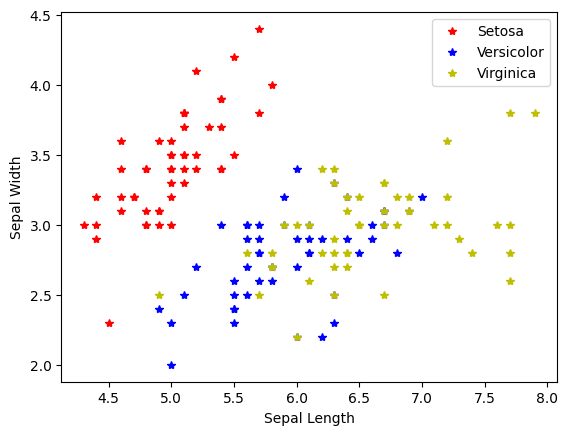

In [1]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
iris =load_iris()
sepal = iris.data[:,0:2]
kind = iris.target
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

plt.plot(sepal[kind==0][:,0],sepal[kind==0][:,1],"r*",label='Setosa')
plt.plot(sepal[kind==1][:,0],sepal[kind==1][:,1],"b*",label='Versicolor')
plt.plot(sepal[kind==2][:,0],sepal[kind==2][:,1],"y*",label='Virginica')
plt.legend()
plt.show()

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

X = iris.data
y = iris.target
# (80:20)으로 분할한다. 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
scores = metrics.accuracy_score(y_test, y_pred)
scores


### 새로운 데이터 학습
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X, y)
#0 = setosa, 1=versicolor, 2=virginica
classes = {0:'setosa',1:'versicolor',2:'virginica'}
# 아직 보지 못한 새로운 데이터를 제시해보자. 
x_new = [[3,4,5,2],
[5,4,2,2]]
y_predict = knn.predict(x_new)
print(classes[y_predict[0]])
print(classes[y_predict[1]])

versicolor
setosa


In [3]:
from sklearn.model_selection import GridSearchCV

pram = {'n_neighbors':[3,4,5,6,7,8]}
grid = GridSearchCV(knn,param_grid=pram,cv=3,scoring='accuracy')
grid.fit(X_train,y_train)
print(grid.best_params_)
best_knn = grid.best_estimator_
pred = best_knn.predict(X_test)
metrics.accuracy_score(y_test,pred)

{'n_neighbors': 7}


0.9666666666666667